In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')

# Step 3: Inspect the datasets
print("Train Data Head:")
print(train_data.head())

print("\nTest Data Head:")
print(test_data.head())

print("\nSample Submission Head:")
print(sample_submission.head())



# Features and target variable
X = train_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
y = train_data['SalePrice']

# Step 5: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("\nMean Squared Error on Validation Set:", mse)

# Step 8: Predict on the test set
test_features = test_data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]
test_predictions = model.predict(test_features)

# Step 9: Generate the submission file
sample_submission['SalePrice'] = test_predictions
sample_submission.to_csv('submission.csv', index=False)
print("\nSubmission file saved as 'submission.csv'.")


Train Data Head:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

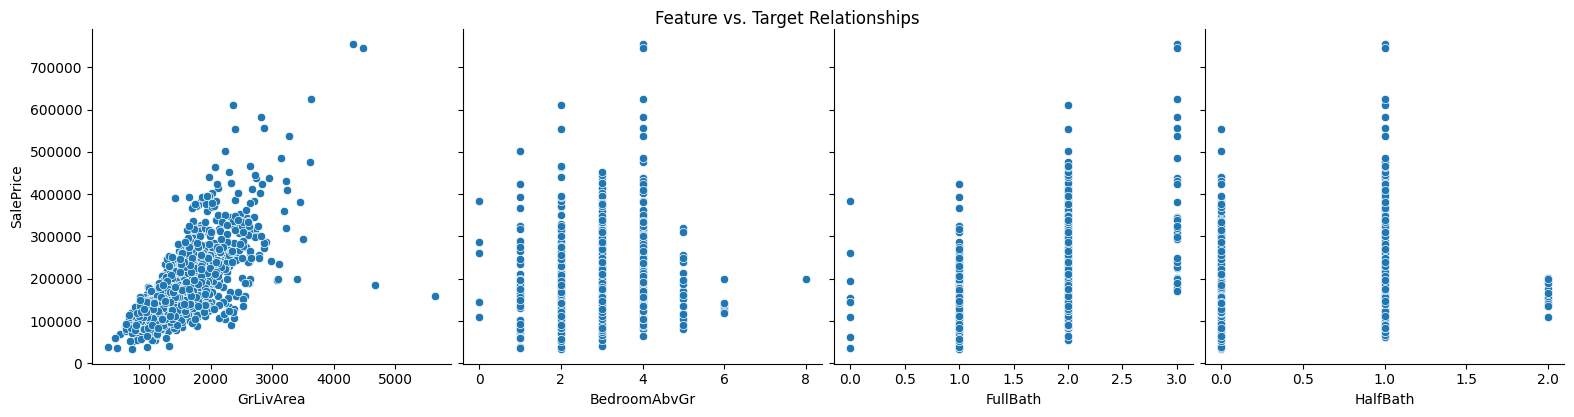

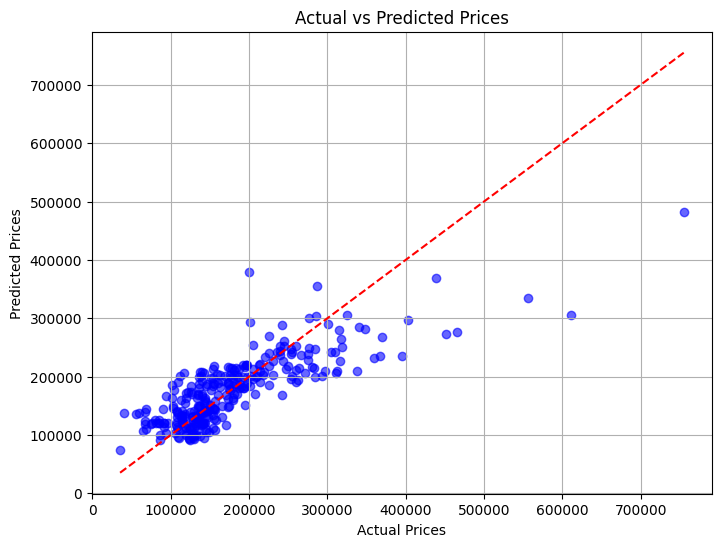

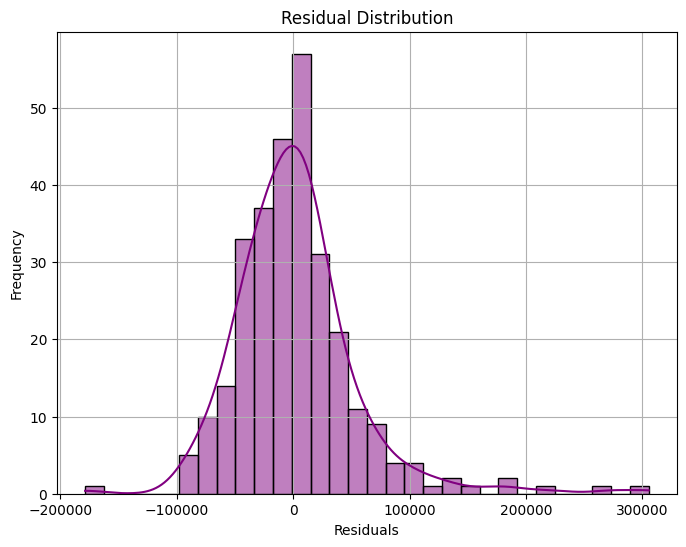

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Pairplot to show relationships between features and target
sns.pairplot(train_data, x_vars=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath'], y_vars='SalePrice', height=4, aspect=1, kind='scatter')
plt.suptitle('Feature vs. Target Relationships', y=1.02)
plt.show()



# Visualization 2: Actual vs Predicted on Validation Set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.6, color='b')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # Line y=x
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Visualization 3: Residual Plot
residuals = y_val - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
